In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from vae.arch import VAE
import matplotlib.pyplot as plt
import os
from IPython import display
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from tensorflow.keras.utils import plot_model

np.set_printoptions(precision=4, suppress = True)

In [3]:
vae = VAE()
vae.set_weights('./vae/weights.h5')

In [4]:
DIR_NAME = './data/rollout/'
file = os.listdir(DIR_NAME)[200]
print(file)
obs_data = np.load(DIR_NAME + file)['obs']
print(obs_data.shape)

812480201.npz
(300, 64, 64, 3)


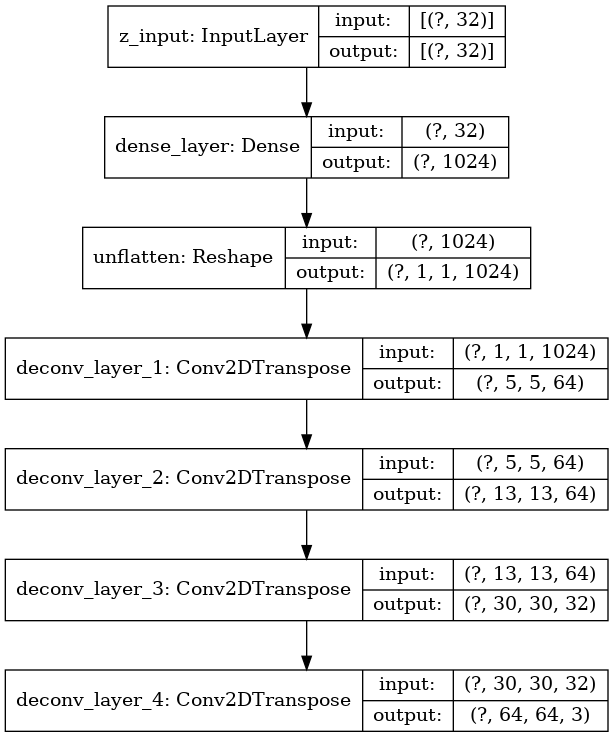

In [5]:
plot_model(vae.encoder, to_file='./vae/encoder.png', show_shapes=True)
plot_model(vae.decoder, to_file='./vae/decoder.png', show_shapes=True)

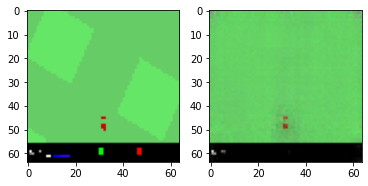

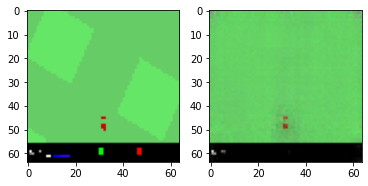

In [6]:
### output from one episode

for idx in range(0,300):
    plt.gca().cla() 
    
    obs = obs_data[idx]
    z_decoded = vae.full_model.predict(np.array([obs]))[0]
    
    plt.subplot(121)
    plt.imshow( obs)
    plt.subplot(122)
    plt.imshow( z_decoded)
    
#     plt.show()
    display.clear_output(wait=True)
    display.display(plt.gcf()) 

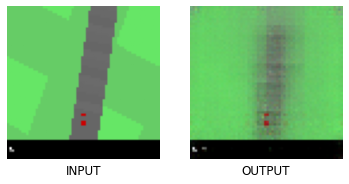

In [8]:
### output from the full_model
DIR_NAME = './data/rollout/'
file = os.listdir(DIR_NAME)[179]
obs_data = np.load(DIR_NAME + file)['obs']

obs = obs_data[50]
reconstruction = vae.full_model.predict(np.array([obs]))[0]

ax1 = plt.subplot(121)
plt.imshow( obs)
ax1.axis('off')
ax1.text(0.5,-0.1, "INPUT", size=12, ha="center", 
         transform=ax1.transAxes)

ax2 = plt.subplot(122)
plt.imshow( reconstruction)
ax2.axis('off')
ax2.text(0.5,-0.1, "OUTPUT", size=12, ha="center", 
         transform=ax2.transAxes);


In [9]:
mus, log_vars, _  = vae.encoder.predict(np.array([obs]))
mu = mus[0]
log_var = log_vars[0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))

encoded_z = vae.encoder.predict(np.array([obs]))[0]
print("z = " + str(encoded_z))

mu = [ 0.7649  0.2363  1.0851  1.6451 -0.0246 -0.6408 -0.5017  0.76   -0.1446
  0.5743 -0.5552  0.8014  0.0926  0.6623 -0.3315  0.5483 -1.1923  0.2864
  0.9853 -0.2398  1.7904  0.25   -0.3949  1.0533 -0.6641 -0.0691  0.9148
 -0.2716 -0.2825  0.3955  0.0437  0.8775]
log_var = [-0.5801 -0.1501 -0.5048 -1.0956 -0.0659 -0.4196 -0.4615 -0.5899 -0.1245
 -0.3494 -0.1369 -0.3732 -0.2294 -0.418  -0.6936 -1.2657 -0.4756 -0.1207
 -2.3422 -0.1473 -2.2581 -0.1373 -0.5552 -0.4581 -0.1585 -0.1431 -0.8256
 -0.0108 -2.7224 -0.2071 -0.7703 -0.6187]
z = [[ 0.7649  0.2363  1.0851  1.6451 -0.0246 -0.6408 -0.5017  0.76   -0.1446
   0.5743 -0.5552  0.8014  0.0926  0.6623 -0.3315  0.5483 -1.1923  0.2864
   0.9853 -0.2398  1.7904  0.25   -0.3949  1.0533 -0.6641 -0.0691  0.9148
  -0.2716 -0.2825  0.3955  0.0437  0.8775]]


informative dimensions:


array([ 0,  2,  3,  7, 14, 15, 18, 20, 22, 26, 28, 30, 31])

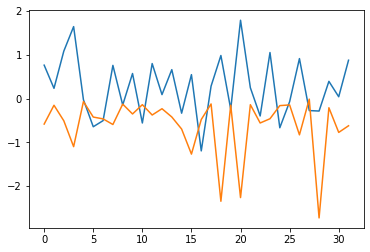

In [10]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs = np.where(abs(log_var) > 0.5)[0]
hot_zs

In [11]:
file1 = os.listdir(DIR_NAME)[100]
obs_data1 = np.load(DIR_NAME + file)['obs']
file2 = os.listdir(DIR_NAME)[140]
obs_data2 = np.load(DIR_NAME + file)['obs']

In [12]:
vae.encoder.predict(np.array([obs_data1[20]]))

[array([[ 0.7993,  0.1189,  1.11  ,  1.6439, -0.0582, -0.6492, -0.4309,
          0.6326, -0.1878,  0.6342, -0.5305,  0.9783,  0.1202,  0.5992,
         -0.1478,  0.6761, -1.2516,  0.3644,  0.9955, -0.1925,  1.6948,
          0.3136, -0.4989,  1.0381, -0.6112, -0.0706,  0.9249, -0.2982,
         -0.2449,  0.4156, -0.0984,  0.8314]], dtype=float32),
 array([[-0.542 , -0.1266, -0.5238, -1.1024, -0.046 , -0.4247, -0.4887,
         -0.6031, -0.148 , -0.341 , -0.1519, -0.4074, -0.3067, -0.4068,
         -0.7549, -1.183 , -0.4725, -0.1308, -2.353 , -0.1504, -2.2826,
         -0.1389, -0.4587, -0.4446, -0.1392, -0.1327, -0.78  ,  0.0097,
         -2.7162, -0.2193, -0.7517, -0.5677]], dtype=float32),
 array([[ 1.5962,  0.6872,  0.9063,  2.3689,  1.6796, -0.9054,  0.0891,
          1.702 ,  0.7357, -0.6853, -0.735 , -0.1889,  0.5599,  1.2556,
         -1.3727,  1.0645, -1.7868,  1.0781,  0.884 , -0.4073,  1.6188,
         -0.3207, -0.145 ,  1.5648, -0.1838,  0.1739,  1.8075, -1.5745,
         -

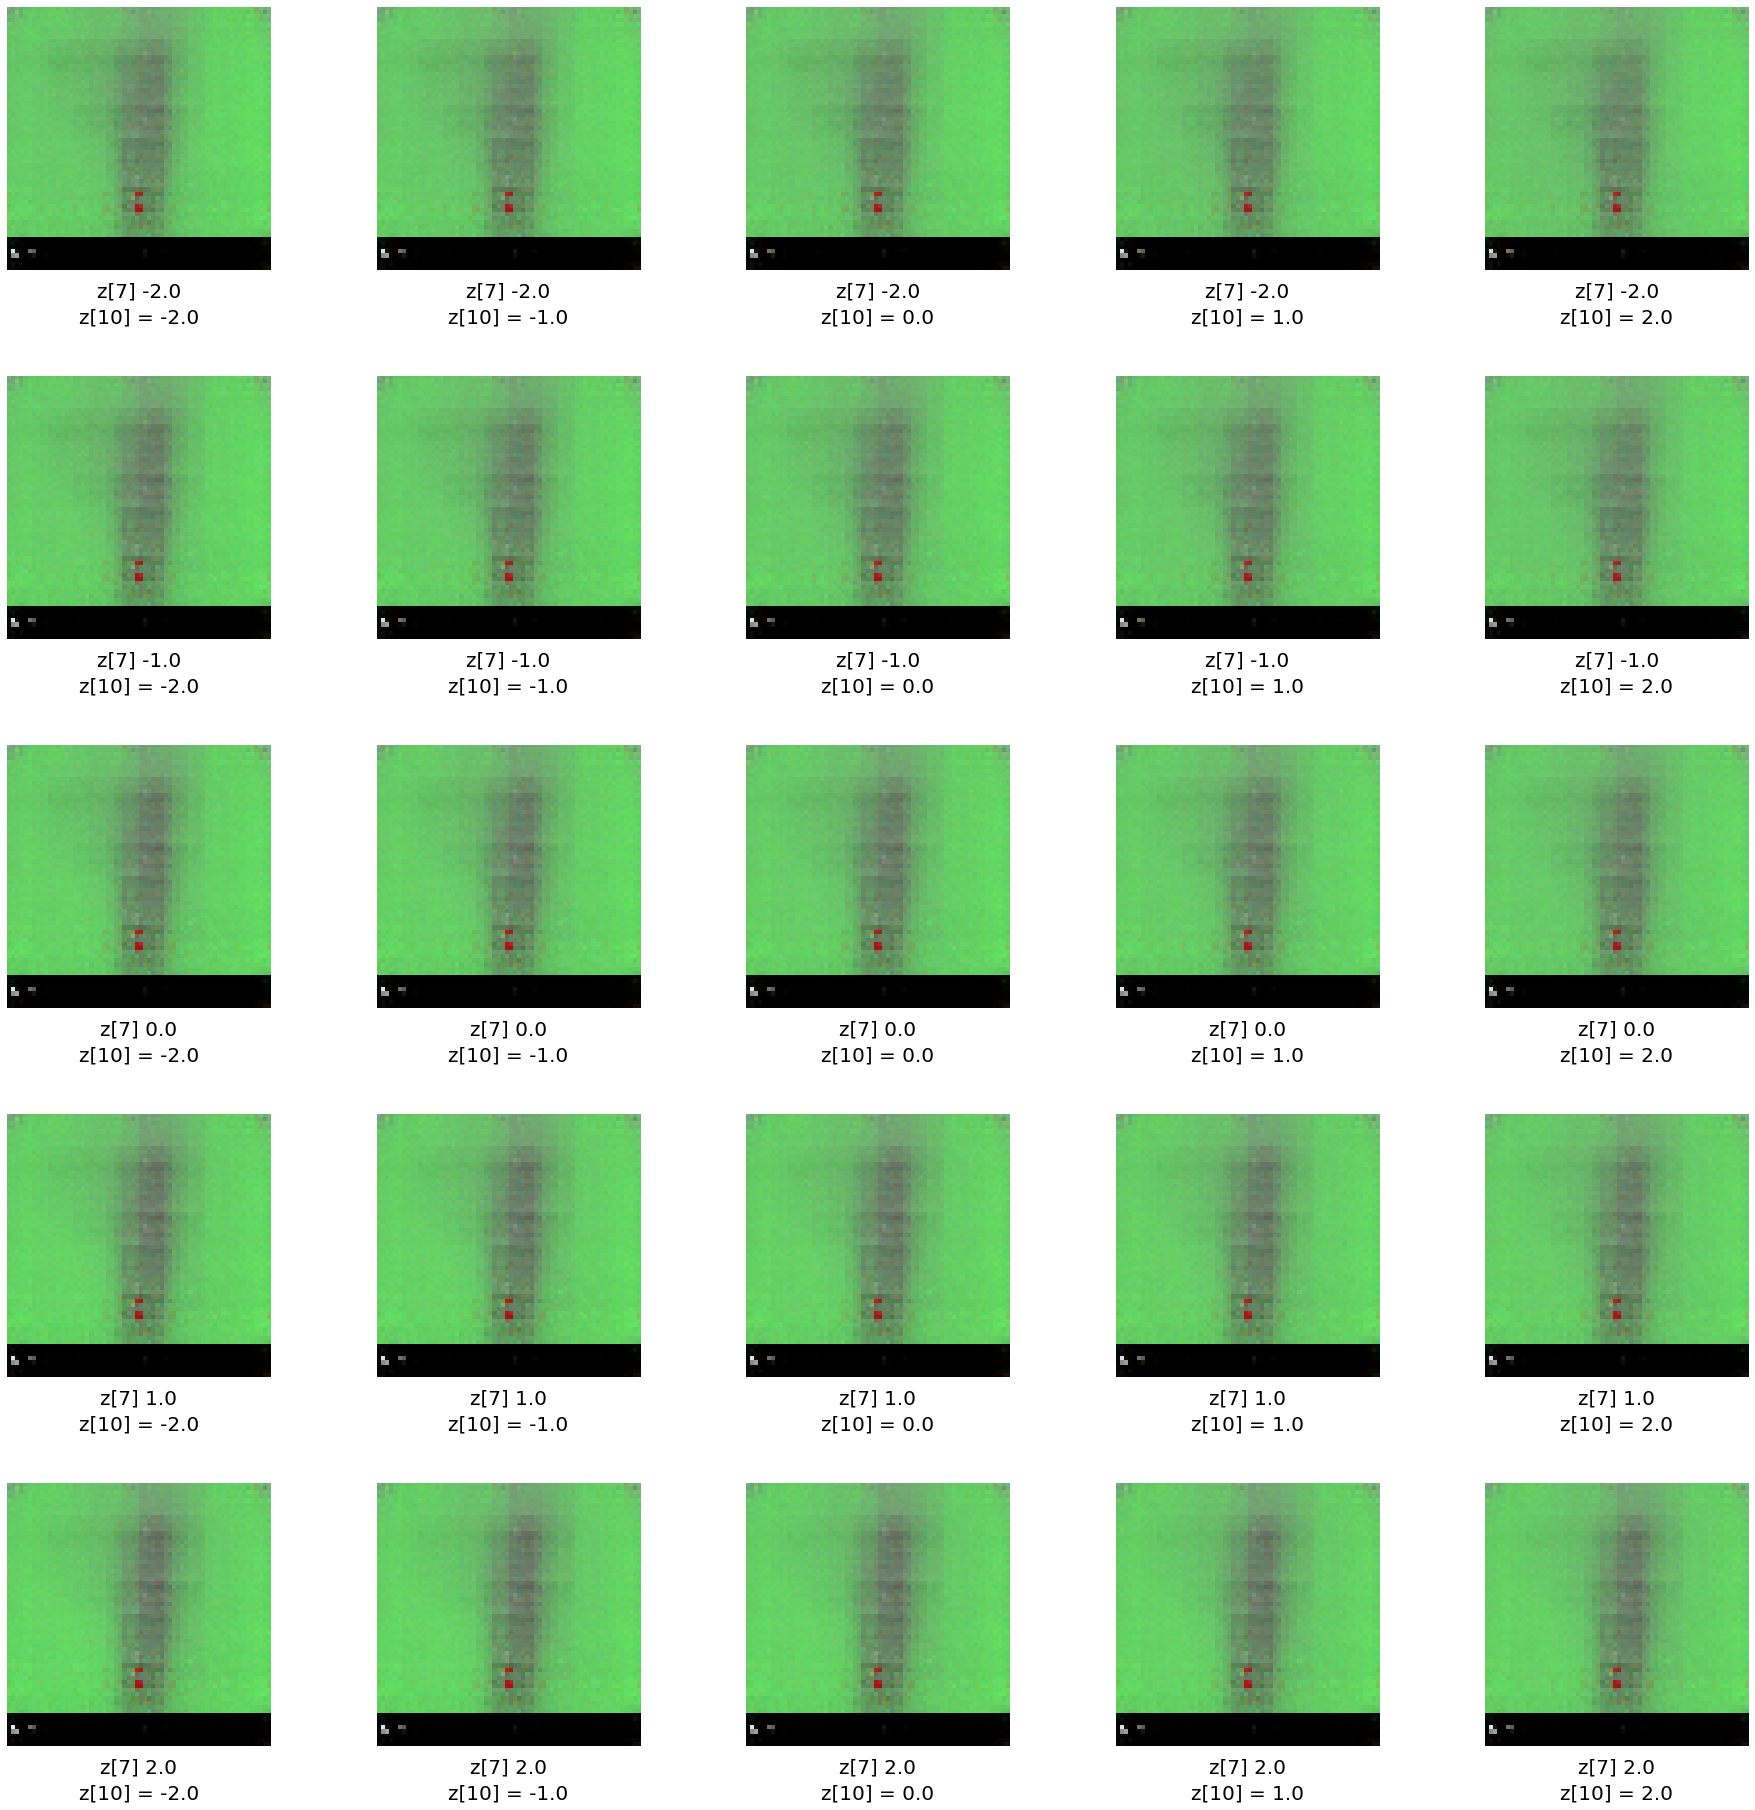

In [13]:
top_left = vae.encoder.predict(np.array([obs_data1[20]]))[2][0]
top_right = vae.encoder.predict(np.array([obs_data1[60]]))[2][0]
bottom_left = vae.encoder.predict(np.array([obs_data2[80]]))[2][0]
sample_z = vae.encoder.predict(np.array([obs_data[60]]))[2][0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[7] = (x-2)
        z[10] = (y-2)
        
        decoded_obs = vae.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs)
        
        axes[x,y].text(0.5,-0.1, 'z[7] ' + str(np.round(z[7],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[10] = ' + str(np.round(z[10],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

In [14]:
def play_with_z(z0 = sample_z[0]
                ,z2 = sample_z[2]
                ,z4 = sample_z[4]
                ,z5 = sample_z[5]
                ,z6 = sample_z[6]
                ,z7 = sample_z[7]
                ,z10 = sample_z[10]
                ,z15 = sample_z[15]
                ,z24= sample_z[24]
                ,z25= sample_z[25]
                ,z27= sample_z[27]
                ):
    z = sample_z.copy()
    z[0] = z0
    z[2] = z2
    z[4] = z4
    z[5] = z5
    z[6] = z6
    z[7] = z7
    z[10] = z10
    z[15] = z15
    z[24] = z24
    z[25] = z25
    z[27] = z27
    
    decoded_obs = vae.decoder.predict(np.array([z]))[0]
    plt.gca().cla() 
    plt.imshow( decoded_obs)

In [15]:
interact(play_with_z
        , z0=(-3.0,3.0,0.1)
        , z2=(-3.0,3.0,0.1)
        , z4=(-3.0,3.0,0.1)
        , z5=(-3.0,3.0,0.1)
        , z6=(-3.0,3.0,0.1)
        , z7=(-3.0,3.0,0.1)
        , z10=(-3.0,3.0,0.1)
        , z15=(-3.0,3.0,0.1)
        , z24=(-3.0,3.0,0.1)
        , z25=(-3.0,3.0,0.1)
        , z27=(-3.0,3.0,0.1)
        )

interactive(children=(FloatSlider(value=2.0277557373046875, description='z0', max=3.0, min=-3.0), FloatSlider(…

<function __main__.play_with_z(z0=2.0277557, z2=0.7001483, z4=0.39507723, z5=0.08654988, z6=-1.0288484, z7=0.30023062, z10=0.6093844, z15=1.2329165, z24=-1.7245466, z25=1.0208092, z27=-0.6226451)>